<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/ML/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python example: Gradient descent method

*Author.* [Tran Thu Le][le]

[le]: https://tranthule.blogspot.com/p/about-me.html

*Note.*
- To run a code cell, click on it and hit `Ctrl+Enter`
- To open this file in Google Colab, change "github" in url to "githubtocolab" and hit `Enter`


## 1. What is [gradient descent][a] method?

[a]: https://en.wikipedia.org/wiki/Gradient_descent

Here we want to solve the following optimization problem 

$$\min_{x\in \mathbb{R^n}} f(x)$$

where $f$ is a "good" function, for example a convex quadratic function.

It is well-known that the gradient of $f$, denoted by $\nabla f$, indicates the direction in which the function increases most quickly. So, to find the minimum, we shall move toward the opposite direction, that is $-\nabla f$. This is the basic idea of gradient descent method. 
More precisely, assuming that we are being at a location, say $x$. To find minimum, in the next step, we should move with a small step-size $\alpha$ ($\alpha\in (0, +\infty)$) in the direction of $-\nabla f(x)$, in this way, our new position is $x-\alpha \nabla f(x)$.

This strategy is encoded by the following pseudo-code.

**Gradient Descent Method**

**INPUT:** $f, \alpha$

**Step 1.** Initialize $x$ at the origin 

**Step 2.** Compute gradient $\nabla f(x)$ 

**Step 3.** Update $x=x-\alpha \nabla f(x)$ and return to Step 2 

**OUTPUT:** x


## 2. Example

### 2.1. Problem

Here, we are going to use gradient descent to find minimum value of the following (convex) quadratic function,
$$\min_{x\in \mathbb{R}^2} \frac{1}{2} x^T A x + b^T x + c$$
Here $A$ is a $2\times 2$ matrix (with two positive eigenvalues), $b$ is a column vector of size $2$, $c$ is a real number. Note that $x$ is also a column vector of size $2$.


Let $f(x)=\frac{1}{2}x^TAx+b^Tx+c$. Then it is easy to see that the [gradient][1] of $f$ is $\nabla f(x)=Ax+b$.



**Gradient Descent Method for quadratic function**

**INPUT:** $A, b, c, \alpha$

**Step 1.** Initialize $x=[0, 0]^T$ 

**Step 2.** Compute gradient $\nabla f(x) = Ax+b$ 

**Step 3.** Update $x=x-\alpha \nabla f(x)$ and return to Step 2 

**OUTPUT:** x

[1]: https://en.wikipedia.org/wiki/Gradient

### 2.2. Code

We first add a popular python package called "numpy" and rename it as "np".

You may imagine that numpy is a collection of tools for matrix and vector calculations.

In [1]:
import numpy as np

We now define our gradient descent algorithm.

In [2]:
def gradient_descent(A, b, c, alpha):
    x_list = [] 
    x = np.array([[0], [0]]) # Step 1 
    for i in range(100):
        gradient = A @ x + b # Step 2
        x = x - alpha*gradient # Step 3
        x_list = x_list + [x]
    return x, x_list

Let us define the precise values for $A, b, c, \alpha$

In [3]:
A = np.array([[2, 0], [0, 8]])
b = np.array([[2], [4]])
c = 2
alpha = 0.05

Here, we see that 
$$f(x) = x_0^2+4x_1^2+2x_0+4x_1+2=(x_0+1)^2+(2x_1+1)^2$$

It is easy to see that the minimum value of $f$ is $0$ when $x=(-1, -0.5)$

As you will see in the following, the gradient method will generate a sequence of $x$ converging to $(-1, -0.5)$.

We run the gradient descent method

In [4]:
x_opt, x_list = gradient_descent(A, b, c, alpha)

Let us see if `x_opt` is close to $(-1, -0.5)$

In [5]:
print(x_opt)

[[-0.99997344]
 [-0.5       ]]


So `x_opt` is indeed our desired minimizer.

For $x$ in `x_list`, we compute its objective value $f(x)$ and plot it out.

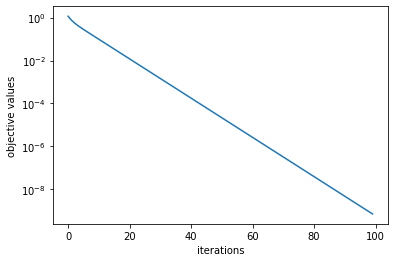

In [6]:
import matplotlib.pyplot as plt # import plotting package

values = [float(0.5 * x.T @ (A @ x) + b.T @ x + c) for x in x_list] 

plt.plot(values)
plt.xlabel("iterations")
plt.ylabel("objective values")
plt.yscale("log")
plt.show()

The figure clearly shows that the objective value indeed converges to $0$ being the minimum value of the problem.

Now, we plot the evolution of $x$ where $x$ in `x_list`

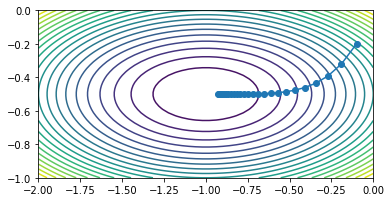

In [7]:
def plot_evolution(x_list):
    x0 = np.linspace(-2, 0, 50)
    x1 = np.linspace(-1, 0, 50)
    x0, x1 = np.meshgrid(x0, x1) 
    f = x0**2 + 4*x1**2 + 2*x0 + 4*x1 + 2 

    x_iter = np.hstack(x_list) 
    x_iter = x_iter[:, :25] # take first 25 x

    fig, ax = plt.subplots()
    ax.contour(x0, x1, f, levels=20)
    ax.plot(x_iter[0, :], x_iter[1, :], "-o")
    ax.set_aspect("equal")
    plt.show()

plot_evolution(x_list)

We see that the sequence converges to $x=(-1, -0.5)$ which is exactly the minimizer of $f$.